### **Delivery Time Analysis Project**

#### This notebook analyzes a simulated delivery dataset to identify patterns, causes of delay, and build a predictive model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Swiggy_Delivery_Dataset.csv")
df['Order_Time'] = pd.to_datetime(df['Order_Time'])
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'])
df['Delivery_Time'] = pd.to_datetime(df['Delivery_Time'])

df.head()

,Order_ID,Restaurant_Location,Customer_Location,Order_Time,Pickup_Delay_Min,Delivery_Distance_km,Traffic_Level,Weather,Cuisine,Rider_ID,Pickup_Time,Delivery_Duration_Min,Delivery_Time,Expected_Delivery_Min,Actual_Delivery_Min,Delivery_Delay
0,O1000,Zone C,Zone B,2023-01-01 10:00:00,11,11.83,Medium,Clear,North Indian,R48,2023-01-01 10:11:00,61,2023-01-01 11:12:00,64.15,72.0,7.85
1,O1001,Zone A,Zone B,2023-01-01 10:05:00,7,6.78,Medium,Rainy,Desserts,R16,2023-01-01 10:12:00,34,2023-01-01 10:46:00,38.90,41.0,2.10
2,O1002,Zone C,Zone C,2023-01-01 10:10:00,7,2.89,Low,Rainy,Desserts,R37,2023-01-01 10:17:00,10,2023-01-01 10:27:00,19.45,17.0,-2.45
3,O1003,Zone C,Zone B,2023-01-01 10:15:00,19,4.00,Low,Rainy,Chinese,R12,2023-01-01 10:34:00,14,2023-01-01 10:48:00,25.00,33.0,8.00
4,O1004,Zone A,Zone A,2023-01-01 10:20:00,12,1.20,Medium,Clear,Fast Food,R18,2023-01-01 10:32:00,7,2023-01-01 10:39:00,11.00,19.0,8.00


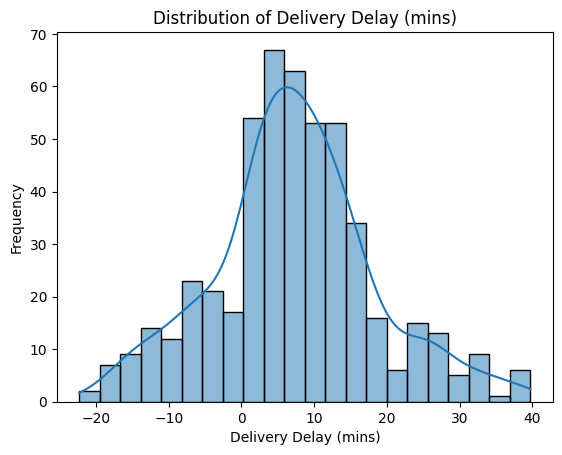

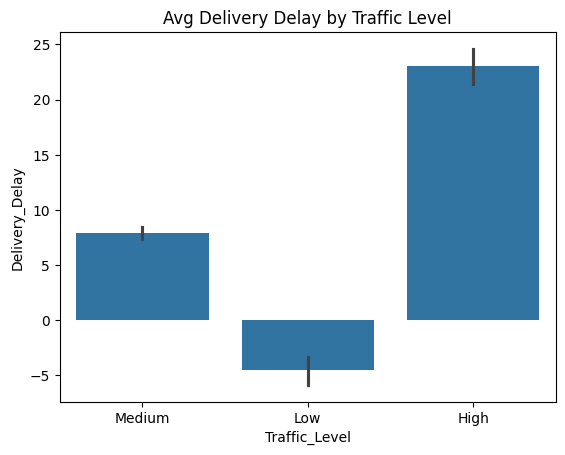

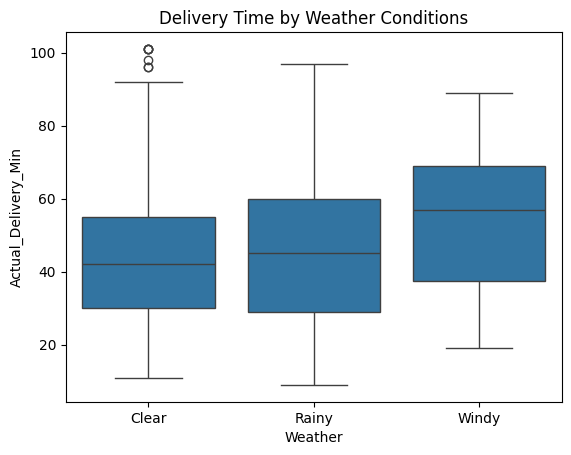

In [3]:
# EDA
# Delivery delay distribution
sns.histplot(df['Delivery_Delay'], kde=True)
plt.title("Distribution of Delivery Delay (mins)")
plt.xlabel("Delivery Delay (mins)")
plt.ylabel("Frequency")
plt.show()

# Average delay by traffic level
sns.barplot(data=df, x='Traffic_Level', y='Delivery_Delay')
plt.title("Avg Delivery Delay by Traffic Level")
plt.show()

# Avg delivery duration by weather
sns.boxplot(data=df, x='Weather', y='Actual_Delivery_Min')
plt.title("Delivery Time by Weather Conditions")
plt.show()

In [4]:
# Feature Engineering
df_model = df[['Delivery_Distance_km', 'Traffic_Level', 'Weather', 'Cuisine', 'Pickup_Delay_Min', 'Actual_Delivery_Min']].copy()
df_model = pd.get_dummies(df_model, drop_first=True)  # Encode categorical variables
df_model.head()

,Delivery_Distance_km,Pickup_Delay_Min,Actual_Delivery_Min,Traffic_Level_Low,Traffic_Level_Medium,Weather_Rainy,Weather_Windy,Cuisine_Desserts,Cuisine_Fast Food,Cuisine_North Indian,Cuisine_South Indian
0,11.83,11,72.0,False,True,False,False,False,False,True,False
1,6.78,7,41.0,False,True,True,False,True,False,False,False
2,2.89,7,17.0,True,False,True,False,True,False,False,False
3,4.00,19,33.0,True,False,True,False,False,False,False,False
4,1.20,12,19.0,False,True,False,False,False,True,False,False


In [8]:
# Predictive Model: Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_model.drop("Actual_Delivery_Min", axis=1)
y = df_model["Actual_Delivery_Min"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.9465892523695579
RMSE: 4.17841807150168
